In [91]:
%matplotlib inline
import cobra
import libsbml
model = cobra.io.read_sbml_model("PlantCoreMetabolism_v2_0_0.xml")
model.solver="glpk"

In [92]:
#generate a 12 phase leaf model with day:night phloem export constrained to 3:1
from cobra import Metabolite
from Functions import generateMultiphaseLeafModel

#add "THREO_DS_ISO_CITRATE_v" to list of metabolites
threo_ds_iso_citrate=Metabolite("THREO_DS_ISO_CITRATE_v",compartment="vacuole")
model.add_metabolites([threo_ds_iso_citrate])
    
ModelF = generateMultiphaseLeafModel(model,number_of_phases=12,
                                     met2accumulate=["STARCH_p","MAL_v","aMAL_v","CIT_v","aCIT_v", "SUCROSE_v","PROTON_v", "FRU_v", "GLC_v", "THREO_DS_ISO_CITRATE_v"],
                                     verbose=False)

In [93]:
#assuming 12h daylenght
sunset = 6

for i in range(1,13):
    #light availability set to 120 µmol m-2 s-1 as in Ceusters et al. (2019)
    rxnL = ModelF.reactions.get_by_id("Photon_tx"+str(i))
    if i>sunset:
        rxnL.upper_bound = 0
    else:
        rxnL.upper_bound = 120

In [94]:
PhaseII = 12,1
PhaseIII = 1,5
PhaseIV = 5,6
PhaseI = 6,12

for i in range(1,13):
    rxnC = ModelF.reactions.get_by_id("CO2_tx"+str(i))
    if i <= 1:
        print("This is phase II")
        rxnC.upper_bound = 1
        rxnC.lower_bound = 0
    elif i > 1 and i <=5:
        print("This is phase III")
        rxnC.upper_bound = 0
        rxnC.lower_bound = -1
    elif i > 5 and i<= 6:
        print("This is phase IV")
        rxnC.upper_bound = 1
        rxnC.lower_bound = 0
    elif i > 6:
        print("This is phase I")
        rxnC.upper_bound = 4
        rxnC.lower_bound = 0
        
from cobra import flux_analysis
sol = flux_analysis.parsimonious.pfba(ModelF)
print("CO2 exchange ="+str(rxnC.flux)+str(i))
print("Sucrose exported ="+str(ModelF.reactions.Diel_phloem_export.flux*0.73))   #Each mol of 'phloem' 

This is phase II
This is phase III
This is phase III
This is phase III
This is phase III
This is phase IV
This is phase I
This is phase I
This is phase I
This is phase I
This is phase I
This is phase I
CO2 exchange =4.012
Sucrose exported =0.3138946340378455


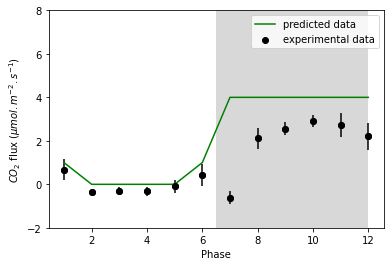

In [95]:
import pandas as pd
import numpy as np
df = pd.read_excel("GasExchange.xlsx")
df
timep = list()
timep=df.iloc[:,1]
timep
gasexh = list()
gasexh=df.iloc[:,2]
gasexh
stdev=list()
stdev=df.iloc[:,3]
stdev
import matplotlib.pyplot as plt
xlist = range(1,13)
ylist = list()
for i in range(1,13):
    ylist.append(ModelF.reactions.get_by_id("CO2_tx"+str(i)).flux)
plt.plot(xlist,ylist,label="predicted data", color='green')
plt.scatter(timep,gasexh,color='black', label='experimental data')
plt.errorbar(timep, gasexh, yerr=stdev, fmt='o', color='black')
plt.legend()
plt.xlabel("Phase")
plt.ylabel("$CO_{2}$ flux ("+r'$ µmol.m^{-2}.s^{-1}$'+")")
plt.ylim(-2,8)
start=6.5
end=12
step=0.5
xlist = [i for i in np.arange(start, end+step, step)]
plt.fill_between(xlist,65,-2,facecolor='grey',alpha=0.3)
plt.savefig('CO2uptake.png', dpi=1200)

In [96]:
import pandas as pd
df = pd.read_excel("ExpMetaboliteData.xlsx")
df

,Hour,Tre6P average,Tre6P STDEV,ADPGlc average,ADPGlc STDEV,Glc1P average,Glc1P STDEV,Gly3P average,Gly3P STDEV,PEP average,...,Malate average,Malate STDEV,Starch average,Starch STDEV,Sucrose average,Sucrose STDEV,Glucose average,Glucose STDEV,Fructose average,Fructose STDEV
0,8,0.001039,0.000173,0.000020,0.000011,0.001275,0.000038,0.001340,0.000287,0.001178,...,22.166805,3.463563,1.461434,0.505262,1.461200,0.161808,0.541709,0.199194,0.600596,0.207339
1,10,0.001247,0.000139,0.000144,0.000030,0.001081,0.000170,0.001572,0.000294,0.006269,...,21.127736,1.731782,4.114814,0.533051,2.055092,0.344292,0.683694,0.098903,0.804047,0.122369
2,12,0.001385,0.000208,0.000142,0.000044,0.001285,0.000236,0.001469,0.000433,0.006338,...,12.815184,1.731782,7.850993,0.764798,1.804937,0.229795,0.747123,0.188208,0.861981,0.238679
3,14,0.001247,0.000139,0.000100,0.000032,0.002002,0.000256,0.002248,0.000627,0.005715,...,7.619839,1.731782,9.670342,0.795652,1.576992,0.221025,0.689183,0.197879,0.794865,0.251481
4,16,0.000866,0.000104,0.000096,0.000029,0.002362,0.000177,0.003831,0.000409,0.001074,...,3.809920,1.039069,15.360978,2.574658,1.915472,0.253486,0.550505,0.214743,0.634426,0.265527
5,18,0.000901,0.000104,0.000058,0.000019,0.002317,0.000190,0.004122,0.000887,0.002563,...,2.424494,1.039069,16.499896,3.534045,1.949733,0.379399,0.713453,0.164099,0.843065,0.230244
6,20,0.000658,0.000139,0.000024,0.000010,0.001337,0.000156,0.003135,0.000641,0.000901,...,2.770851,0.692713,15.348692,2.658746,1.868774,0.249467,0.881410,0.241654,1.041523,0.283570
7,22,0.000727,0.000035,0.000021,0.000022,0.001884,0.000121,0.002130,0.000845,0.000623,...,10.044334,2.424494,12.498887,2.064579,1.915619,0.343639,0.645096,0.289476,0.584370,0.245597
8,0,0.000727,0.000069,0.000014,0.000007,0.001860,0.000246,0.001146,0.000229,0.000520,...,13.161541,1.385425,10.133589,0.801612,1.524218,0.303094,0.810213,0.112538,0.820344,0.142881
9,2,0.000797,0.000035,0.000018,0.000012,0.001863,0.000246,0.001153,0.000152,0.000450,...,19.395955,1.731782,6.878455,0.910757,1.438945,0.344106,0.856619,0.255323,1.021498,0.294428


In [97]:
keyDict = {'Citrate':["CIT_v","aCIT_v"],#
 'Malate':["MAL_v","aMAL_v"],#
 'Starch':["STARCH_p"],#
 'Sucrose': ["SUCROSE_v"],#
 'Glucose': ["GLC_v"],#
 'Fructose':["FRU_v"],#
 'Iso-citrate':["THREO_DS_ISO_CITRATE_v"]}

In [98]:
backup=ModelF.copy()

In [99]:
ModelF=backup.copy()
sunset = 6

for MetExp in keyDict.keys():
    if keyDict[MetExp]==["",]:
        continue
    b = MetExp
    for i in range(1,13):
        MetExp = b
        if MetExp == "Citrate":
            rxn1 = ModelF.reactions.get_by_id("CIT_v"+str(i)+"_accumulation")
            rxn2 = ModelF.reactions.get_by_id("aCIT_v"+str(i)+"_accumulation")
            if i>sunset:
                rxn1.upper_bound = max(df["Citrate average"][7:])*0.5
                rxn1.lower_bound = min(df["Citrate average"][7:])*0.5
                rxn2.upper_bound = max(df["Citrate average"][7:])*0.5
                rxn2.lower_bound = min(df["Citrate average"][7:])*0.5
            else:
                rxn1.upper_bound = max(df["Citrate average"][:7])*0.5
                rxn1.lower_bound = min(df["Citrate average"][:7])*0.5
                rxn2.upper_bound = max(df["Citrate average"][:7])*0.5
                rxn2.lower_bound = min(df["Citrate average"][:7])*0.5
        elif MetExp == "Malate":
            rxn1 = ModelF.reactions.get_by_id("MAL_v"+str(i)+"_accumulation")
            rxn2 = ModelF.reactions.get_by_id("aMAL_v"+str(i)+"_accumulation")
            if i>sunset:
                rxn1.upper_bound = max(df["Malate average"][7:])*0.7
                rxn1.lower_bound = min(df["Malate average"][7:])*0.7
                rxn2.upper_bound = max(df["Malate average"][7:])*0.3
                rxn2.lower_bound = min(df["Malate average"][7:])*0.3
            else:
                rxn1.upper_bound = max(df["Malate average"][:7])*0.7
                rxn1.lower_bound = min(df["Malate average"][:7])*0.7
                rxn2.upper_bound = max(df["Malate average"][:7])*0.3
                rxn2.lower_bound = min(df["Malate average"][:7])*0.3
        else:
            rxn = ModelF.reactions.get_by_id(keyDict[MetExp][0]+str(i)+"_accumulation")
            if i>sunset:
                rxn.upper_bound = max(df[MetExp+" average"][7:])
                rxn.lower_bound = min(df[MetExp+" average"][7:])
            else:
                rxn.upper_bound = max(df[MetExp+" average"][:7])
                rxn.lower_bound = min(df[MetExp+" average"][:7])

from cobra import flux_analysis
sol = flux_analysis.parsimonious.pfba(ModelF)

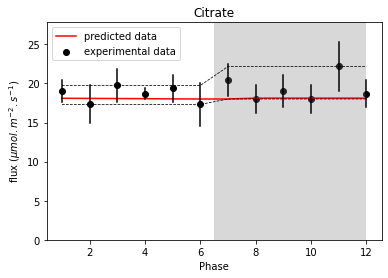

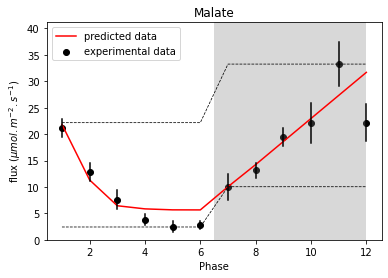

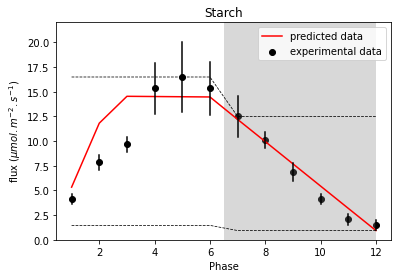

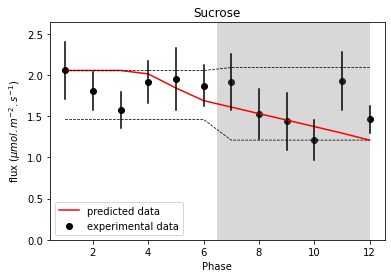

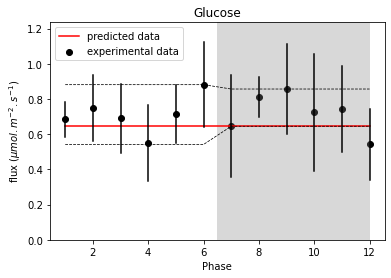

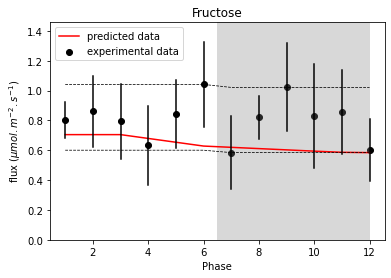

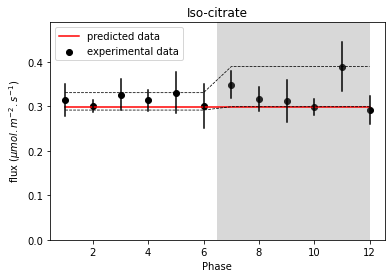

In [100]:
from Functions import generateMetabolitePlots
generateMetabolitePlots(ModelF,sol,df,keyDict)

In [27]:
#assign fake compartment to metabolites not associated to any compartment and write ModelF to .xml
for met in ModelF.metabolites:
    if met.compartment=="" or met.compartment == None:
        met.compartment="f"
cobra.io.write_sbml_model(ModelF, "CAM_12PModel.xml")